# MCSE Assignment-2

### Task-2: Case Study Assignment

SRN: `PES2UG23CS368`

#### Perform data analysis on the suicides dataset and answer the following question:


- Show the results of the central limit theorem for df[‘suicides_no’] as the population. 
  - Show that the mean of the sampling distribution approaches the true mean.
- Create a QQ plot for df[‘suicides_no’]. 
  - Does the data closely follow a straight line, indicating that it follows a normal distribution? 
  - Discuss any deviations and potential causes.
- Calculate and present the summary statistics (mean, median, variance, standard deviation, skewness, kurtosis) for the suicides_no column.
  - What insights can you draw about the distribution of suicide numbers from these statistics?
- Create a bar chart showing the distribution of Loan_Status. How many applicants were approved (Y) for loans, and how many were not approved (N)? How many applicants have Dependents greater than or equal to 2? [ Refer to train.csv ]


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Data Cleanup

In [2]:
# load datasets
suicides_df = pd.read_csv('suicides.csv')
train_df = pd.read_csv('train.csv')

In [3]:
# data-cleaning: drop irrelevant columns for analysis
# drop only the columns that exist in the dataset
columns_to_drop = ['country', 'year', 'sex', 'age', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'generation']
columns_in_df = [col for col in columns_to_drop if col in suicides_df.columns]
suicides_clean = suicides_df.drop(columns=columns_in_df)

### Show the results of the central limit theorem for df[‘suicides_no’] as the population.

In [4]:
# Central Limit Theorem (CLT)
population = suicides_clean['suicides_no'].dropna()
true_mean = population.mean()

In [5]:
# take random samples and calculate sample means
def sample_means(population, n_samples, sample_size):
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

In [6]:
# 1000 samples with sample size 30
sample_means_data = sample_means(population, 1000, 30)

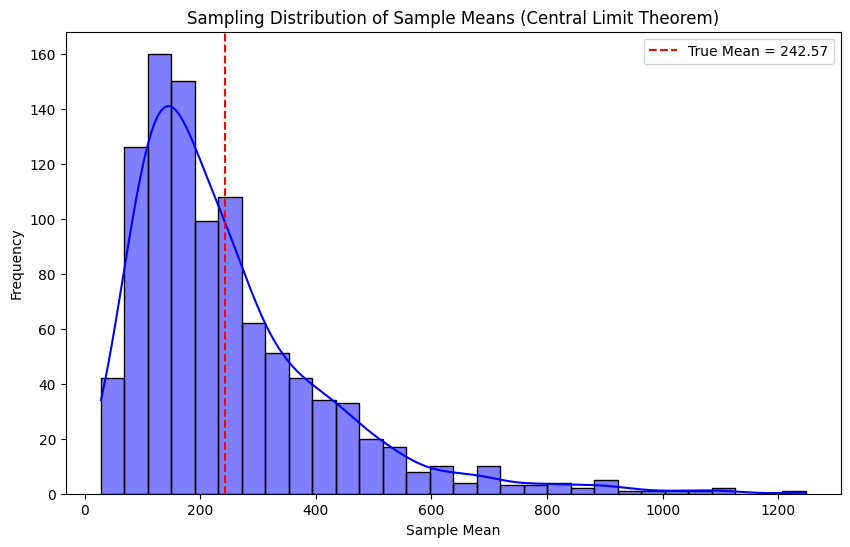

In [7]:
# plotting histogram of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means_data, kde=True, color='blue', bins=30)
plt.axvline(true_mean, color='red', linestyle='--', label=f'True Mean = {true_mean:.2f}')
plt.title('Sampling Distribution of Sample Means (Central Limit Theorem)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Create a QQ plot for df[‘suicides_no’]

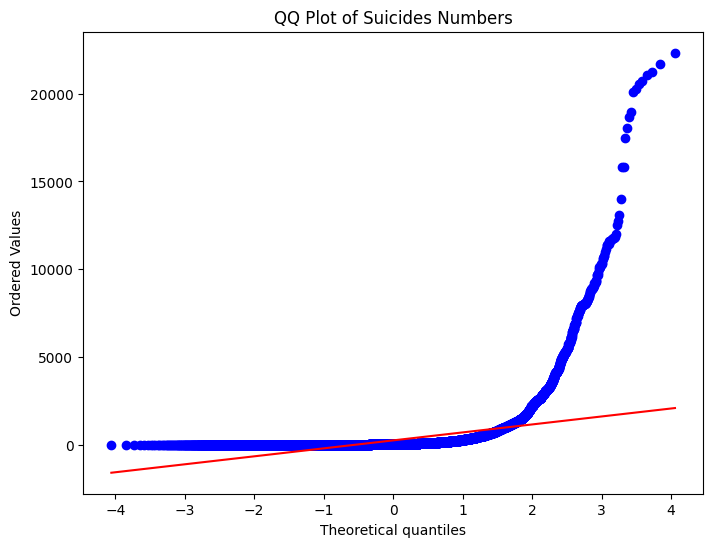

In [8]:
# QQ plot for suicides_no to check normality
plt.figure(figsize=(8, 6))
stats.probplot(population, dist="norm", plot=plt)
plt.title('QQ Plot of Suicides Numbers')
plt.show()

### Calculate and present the summary statistics (mean, median, variance, standard deviation, skewness, kurtosis) for the suicides_no column.

In [9]:
# summary statistics for suicides_no
summary_stats = population.describe()
variance = population.var()
std_dev = population.std()
skewness = population.skew()
kurtosis = population.kurtosis()

In [10]:
# adding more statistics to the summary
summary_stats['variance'] = variance
summary_stats['std_dev'] = std_dev
summary_stats['skewness'] = skewness
summary_stats['kurtosis'] = kurtosis
print(summary_stats)

count        27820.000000
mean           242.574407
std            902.047917
min              0.000000
25%              3.000000
50%             25.000000
75%            131.000000
max          22338.000000
variance    813690.444264
std_dev        902.047917
skewness        10.352910
kurtosis       157.168842
Name: suicides_no, dtype: float64


### Create a bar chart showing the distribution of Loan_Status. 

How many applicants were approved (Y) for loans, and how many were not approved (N)?

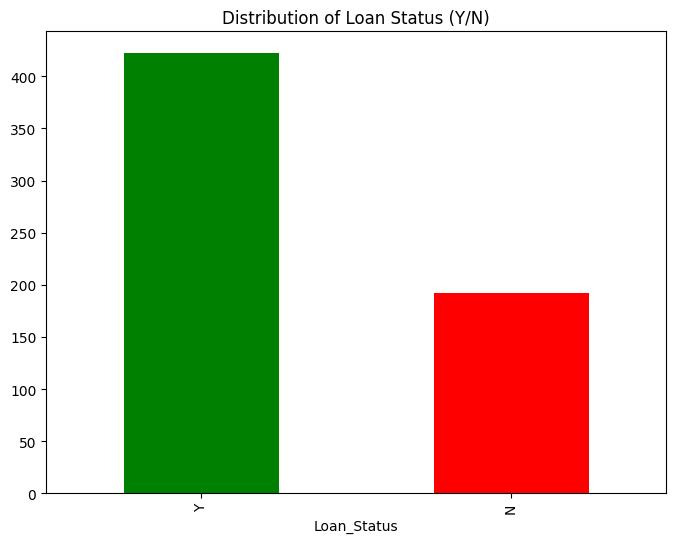

In [11]:
# bar chart for Loan_Status in train.csv
loan_status_count = train_df['Loan_Status'].value_counts()

plt.figure(figsize=(8, 6))
loan_status_count.plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Loan Status (Y/N)')
plt.show()

#### How many applicants have Dependents greater than or equal to 2? [ Refer to train.csv ]

In [12]:
# Clean the Dependents column
train_df['Dependents'] = train_df['Dependents'].replace('3+', '3')

# Take the rows where Dependents >= 2
dependents_filtered = train_df[train_df['Dependents'].astype(float) >= 2]

# Count the number of applicants with Dependents >= 2
dependents_gte_2 = dependents_filtered.shape[0]

print(f"Number of applicants with Dependents >= 2: {dependents_gte_2}")

Number of applicants with Dependents >= 2: 152
